In [1]:
import pandas as pd

from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession, HiveContext
from pyspark.sql import SQLContext

In [2]:
#Spark Session
spark = SparkSession.builder \
    .master("local[*]")  \
    .appName('Obligatorio') \
    .config('spark.executor.memory', '5gb') \
    .config("spark.cores.max", "6") \
    .getOrCreate()

sc = spark.sparkContext
sqlContext = SQLContext(sc)

spark_df = sqlContext.read.parquet('hdfs://192.168.56.101:9000/obligatorio_parquet')

In [3]:
spark_df.head()

Row(airline_name='Southwest Airlines Co.', year=2015, month=3, day=16, day_of_week=1, airline='WN', flight_number=650, tail_number='N222WN', origin_airport='ALB', destination_airport='BWI', scheduled_departure=1150, departure_time=1151, departure_delay=1, taxi_out=7, wheels_off=1158, scheduled_time=80, elapsed_time=64, air_time=52, distance=289, wheels_on=1250, taxi_in=5, scheduled_arrival=1310, arrival_time=1255, arrival_delay=-15, diverted=None, cancelled=None, cancellation_reason='', air_system_delay='', security_delay='', airline_delay='', late_aircraft_delay='', weather_delay='')

In [4]:
spark_df = spark_df[spark_df['airline'] == 'AA']
spark_df = spark_df[spark_df['month'] == 9]
pandas_df = spark_df.select("*").toPandas()

In [5]:
pandas_df.head()

,airline_name,year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,...,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
0,American Airlines Inc.,2015,9,13,7,AA,2326,N012AA,IAH,MIA,...,2236.0,-23.0,None,None,,,,,,
1,American Airlines Inc.,2015,9,28,1,AA,2224,N528AA,MSP,ORD,...,1627.0,168.0,None,None,,7,0,49,112,0
2,American Airlines Inc.,2015,9,13,7,AA,2315,N3JNAA,MCO,MIA,...,2040.0,4.0,None,None,,,,,,
3,American Airlines Inc.,2015,9,13,7,AA,218,N864AA,SFO,LAX,...,2143.0,42.0,None,None,,9,0,0,33,0
4,American Airlines Inc.,2015,9,28,1,AA,97,N3KGAA,DCA,DFW,...,1430.0,-5.0,None,None,,,,,,


In [6]:
def late(row):
    if row['arrival_delay'] > 0:
        val = 1
    else:
        val = 0
    return val

In [7]:
pandas_df ['late'] = pandas_df.apply(late, axis=1)

In [8]:
pandas_df.head(20)

,airline_name,year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,...,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay,late
0,American Airlines Inc.,2015,9,13,7,AA,2326,N012AA,IAH,MIA,...,-23.0,None,None,,,,,,,0
1,American Airlines Inc.,2015,9,28,1,AA,2224,N528AA,MSP,ORD,...,168.0,None,None,,7,0,49,112,0,1
2,American Airlines Inc.,2015,9,13,7,AA,2315,N3JNAA,MCO,MIA,...,4.0,None,None,,,,,,,1
3,American Airlines Inc.,2015,9,13,7,AA,218,N864AA,SFO,LAX,...,42.0,None,None,,9,0,0,33,0,1
4,American Airlines Inc.,2015,9,28,1,AA,97,N3KGAA,DCA,DFW,...,-5.0,None,None,,,,,,,0
5,American Airlines Inc.,2015,9,13,7,AA,40,N3CSAA,BOS,ORD,...,49.0,None,None,,0,0,0,49,0,1
6,American Airlines Inc.,2015,9,18,5,AA,1578,N3BEAA,BOS,DFW,...,-45.0,None,None,,,,,,,0
7,American Airlines Inc.,2015,9,18,5,AA,1875,N724UW,RIC,CLT,...,-7.0,None,None,,,,,,,0
8,American Airlines Inc.,2015,9,16,3,AA,699,N755US,RDU,LAX,...,3.0,None,None,,,,,,,1
9,American Airlines Inc.,2015,9,28,1,AA,29,N5FFAA,MIA,BOS,...,-15.0,None,None,,,,,,,0


In [9]:
pandas_df.shape

(73379, 33)

In [10]:
pandas_df.isnull().values.any()

True

In [11]:
pandas_df.isnull().sum()

airline_name               0
year                       0
month                      0
day                        0
day_of_week                0
airline                    0
flight_number              0
tail_number                0
origin_airport             0
destination_airport        0
scheduled_departure        0
departure_time           321
departure_delay          321
taxi_out                 350
wheels_off               350
scheduled_time             0
elapsed_time             491
air_time                 491
distance                   0
wheels_on                365
taxi_in                  365
scheduled_arrival          0
arrival_time             365
arrival_delay            491
diverted               73379
cancelled              73379
cancellation_reason        0
air_system_delay           0
security_delay             0
airline_delay              0
late_aircraft_delay        0
weather_delay              0
late                       0
dtype: int64

In [12]:
pandas_df = pandas_df[["month", "day", "day_of_week", "origin_airport", "destination_airport", "scheduled_departure", "late"]]
pandas_df.isnull().sum()

month                  0
day                    0
day_of_week            0
origin_airport         0
destination_airport    0
scheduled_departure    0
late                   0
dtype: int64

In [13]:
pandas_df.head()

,month,day,day_of_week,origin_airport,destination_airport,scheduled_departure,late
0,9,13,7,IAH,MIA,1930,0
1,9,28,1,MSP,ORD,1211,1
2,9,13,7,MCO,MIA,1930,1
3,9,13,7,SFO,LAX,1930,1
4,9,28,1,DCA,DFW,1212,0


In [14]:
import math
def binned(df):
    for index, row in df.iterrows():
       df.loc[index, 'scheduled_departure'] = math.floor(row['scheduled_departure'] / 100)
   

In [15]:
binned(pandas_df)
pandas_df.head()

,month,day,day_of_week,origin_airport,destination_airport,scheduled_departure,late
0,9,13,7,IAH,MIA,19,0
1,9,28,1,MSP,ORD,12,1
2,9,13,7,MCO,MIA,19,1
3,9,13,7,SFO,LAX,19,1
4,9,28,1,DCA,DFW,12,0


In [16]:
pandas_df = pd.get_dummies(pandas_df, columns=['origin_airport', 'destination_airport'])
pandas_df.head()

,month,day,day_of_week,scheduled_departure,late,origin_airport_ABQ,origin_airport_ALB,origin_airport_ANC,origin_airport_ATL,origin_airport_AUS,...,destination_airport_SLC,destination_airport_SMF,destination_airport_SNA,destination_airport_STL,destination_airport_STT,destination_airport_STX,destination_airport_SYR,destination_airport_TPA,destination_airport_TUL,destination_airport_TUS
0,9,13,7,19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,28,1,12,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,13,7,19,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,13,7,19,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,28,1,12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(pandas_df.drop('late', axis=1), pandas_df['late'], test_size=0.2, random_state=42)

In [18]:
train_x.shape

(58703, 180)

In [19]:
test_x.shape

(14676, 180)

In [20]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=13)
model.fit(train_x, train_y)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=13, verbose=0, warm_start=False)

In [21]:
# mean accuracy 
predicted = model.predict(test_x)
model.score(test_x, test_y)

0.7074816026165167

In [37]:
prediction = pd.DataFrame(predicted, columns=['predictions']).to_csv('prediction.csv')

In [22]:
#prediction of probability ,chance of being on time
from sklearn.metrics import roc_auc_score
probabilities = model.predict_proba(test_x)
roc_auc_score(test_y, probabilities[:, 1])

0.6574425577020072

In [32]:
print(probabilities)

[[0.9 0.1]
 [1.  0. ]
 [0.9 0.1]
 ...
 [0.8 0.2]
 [1.  0. ]
 [0.9 0.1]]


In [23]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, predicted)

array([[9146, 1222],
       [3071, 1237]])

In [24]:
#presicion
from sklearn.metrics import precision_score

train_predictions = model.predict(train_x)
precision_score(train_y, train_predictions)

0.9885370118515641

In [25]:
#recall
from sklearn.metrics import recall_score

recall_score(train_y, train_predictions)

0.9130278741476253

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

Text(0, 0.5, 'True Positive Rate')

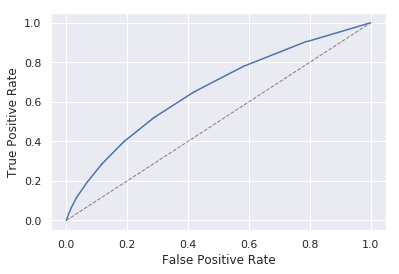

In [27]:
#ROC AUC graph

from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(test_y, probabilities[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [28]:
def predict_on_time(departure_date_time, origin, destination):
    from datetime import datetime

    try:
        departure_date_time_parsed = datetime.strptime(departure_date_time, '%d/%m/%Y %H:%M:%S')
    except ValueError as e:
        return 'Error parsing date/time - {}'.format(e)

    month = departure_date_time_parsed.month
    day = departure_date_time_parsed.day
    day_of_week = departure_date_time_parsed.isoweekday()
    hour = departure_date_time_parsed.hour

    #origin = origin.upper()
    #destination = destination.upper()

    input = [{'month': month,
              'day': day,
              'day_of_week': day_of_week,
              'scheduled_departure': hour,
              'origin_airport_ABQ': 1 if origin == 'ABQ' else 0,
              'origin_airport_ALB': 1 if origin == 'ALB' else 0,
              'origin_airport_ANC': 1 if origin == 'ANC' else 0,
              'origin_airport_ATL': 1 if origin == 'ATL' else 0,
              'origin_airport_AUS': 1 if origin == 'AUS' else 0,
              'origin_airport_BDL': 1 if origin == 'BDL' else 0,
              'origin_airport_BNA': 1 if origin == 'BNA' else 0,
              'origin_airport_BOI': 1 if origin == 'BOI' else 0,
              'origin_airport_BOS': 1 if origin == 'BOS' else 0,
              'origin_airport_BUF': 1 if origin == 'BUF' else 0,
              'origin_airport_BWI': 1 if origin == 'BWI' else 0,			  
              'origin_airport_CHS': 1 if origin == 'CHS' else 0,			  
              'origin_airport_CLE': 1 if origin == 'CLE' else 0,			  
              'origin_airport_CLT': 1 if origin == 'CLT' else 0,			  
              'origin_airport_CMH': 1 if origin == 'CHM' else 0,			  
              'origin_airport_COS': 1 if origin == 'COS' else 0,			  
              'origin_airport_DAY': 1 if origin == 'DAY' else 0,			  
              'origin_airport_DCA': 1 if origin == 'DCA' else 0,			  
              'origin_airport_DEN': 1 if origin == 'DEN' else 0,			  
              'origin_airport_DFW': 1 if origin == 'DFW' else 0,			  
              'origin_airport_DSM': 1 if origin == 'DSM' else 0,			  
              'origin_airport_DTW': 1 if origin == 'DTW' else 0,			  
              'origin_airport_EGE': 1 if origin == 'EGE' else 0,			  
              'origin_airport_ELP': 1 if origin == 'ELP' else 0,			  
              'origin_airport_EWR': 1 if origin == 'EWR' else 0,			  
              'origin_airport_FAT': 1 if origin == 'FAT' else 0,			  
              'origin_airport_FLL': 1 if origin == 'FLL' else 0,			  
              'origin_airport_GEG': 1 if origin == 'GEG' else 0,			  
              'origin_airport_GSO': 1 if origin == 'GSO' else 0,			  
              'origin_airport_HNL': 1 if origin == 'HNL' else 0,			  
              'origin_airport_HNL': 1 if origin == 'HNL' else 0,			  
              'origin_airport_IAD': 1 if origin == 'IAD' else 0,			  
              'origin_airport_IAH': 1 if origin == 'IAH' else 0,			  
              'origin_airport_ILM': 1 if origin == 'ILM' else 0,			  
              'origin_airport_IND': 1 if origin == 'IND' else 0,			  
              'origin_airport_JAC': 1 if origin == 'JAC' else 0,			  
              'origin_airport_JAX': 1 if origin == 'JAX' else 0,			  
              'origin_airport_JFK': 1 if origin == 'JFK' else 0,			  
              'origin_airport_KOA': 1 if origin == 'KOA' else 0,			  
              'origin_airport_LAS': 1 if origin == 'LAS' else 0,			  
              'origin_airport_LAX': 1 if origin == 'LAX' else 0,			  
              'origin_airport_LBB': 1 if origin == 'LBB' else 0,			  
              'origin_airport_LGA': 1 if origin == 'LGA' else 0,			  
              'origin_airport_LIH': 1 if origin == 'LIH' else 0,			  
              'origin_airport_MCI': 1 if origin == 'MCI' else 0,			  
              'origin_airport_MCO': 1 if origin == 'MCO' else 0,			  
              'origin_airport_MEM': 1 if origin == 'MEM' else 0,			  
              'origin_airport_MFE': 1 if origin == 'MFE' else 0,			  
              'origin_airport_MIA': 1 if origin == 'MIA' else 0,			  
              'origin_airport_MKE': 1 if origin == 'MKE' else 0,			  
              'origin_airport_MSP': 1 if origin == 'MSP' else 0,			  
              'origin_airport_MSY': 1 if origin == 'MSY' else 0,			  
              'origin_airport_OAK': 1 if origin == 'OAK' else 0,			  
              'origin_airport_OGG': 1 if origin == 'OGG' else 0,			  
              'origin_airport_OKC': 1 if origin == 'OKC' else 0,			  
              'origin_airport_OMA': 1 if origin == 'OMA' else 0,			  
              'origin_airport_ONT': 1 if origin == 'ONT' else 0,			  
              'origin_airport_ORD': 1 if origin == 'ORD' else 0,			  
              'origin_airport_ORF': 1 if origin == 'ORF' else 0,			  
              'origin_airport_PBI': 1 if origin == 'PBI' else 0,			  
              'origin_airport_PDX': 1 if origin == 'PDX' else 0,			  
              'origin_airport_PHL': 1 if origin == 'PHL' else 0,			  
              'origin_airport_PHX': 1 if origin == 'PHX' else 0,			  
              'origin_airport_PIT': 1 if origin == 'PIT' else 0,			  
              'origin_airport_PSP': 1 if origin == 'PSP' else 0,			  
              'origin_airport_PVD': 1 if origin == 'PVD' else 0,			  
              'origin_airport_PWM': 1 if origin == 'PWM' else 0,			  
              'origin_airport_RDU': 1 if origin == 'RDU' else 0,			  
              'origin_airport_RIC': 1 if origin == 'RIC' else 0,			  
              'origin_airport_RNO': 1 if origin == 'RNO' else 0,			  
              'origin_airport_ROC': 1 if origin == 'ROC' else 0,			  
              'origin_airport_RSW': 1 if origin == 'RSW' else 0,			  
              'origin_airport_SAN': 1 if origin == 'SAN' else 0,			  
              'origin_airport_SAT': 1 if origin == 'SAT' else 0,			  
              'origin_airport_SDF': 1 if origin == 'SDF' else 0,			  
              'origin_airport_SEA': 1 if origin == 'SEA' else 0,			  
              'origin_airport_SFO': 1 if origin == 'SFO' else 0,			  
              'origin_airport_SJC': 1 if origin == 'SJC' else 0,			  
              'origin_airport_SJU': 1 if origin == 'SJU' else 0,			  
              'origin_airport_SLC': 1 if origin == 'SLC' else 0,			  
              'origin_airport_SMF': 1 if origin == 'SMF' else 0,			  
              'origin_airport_SNA': 1 if origin == 'SNA' else 0,			  
              'origin_airport_STL': 1 if origin == 'STL' else 0,			  
              'origin_airport_STT': 1 if origin == 'STT' else 0,			  
              'origin_airport_STX': 1 if origin == 'STX' else 0,			  
              'origin_airport_SYR': 1 if origin == 'SYR' else 0,			  
              'origin_airport_TPA': 1 if origin == 'TPA' else 0,			  
              'origin_airport_TUL': 1 if origin == 'TUL' else 0,			  
              'origin_airport_TUS': 1 if origin == 'TUS' else 0,			  
              'destination_airport_ABQ': 1 if destination == 'ABQ' else 0,
              'destination_airport_ALB': 1 if destination == 'ALB' else 0,
              'destination_airport_ANC': 1 if destination == 'ANC' else 0,
              'destination_airport_ATL': 1 if destination == 'ATL' else 0,
              'destination_airport_AUS': 1 if destination == 'AUS' else 0,
              'destination_airport_BDL': 1 if destination == 'BDL' else 0,
              'destination_airport_BNA': 1 if destination == 'BNA' else 0,
              'destination_airport_BOI': 1 if destination == 'BOI' else 0,
              'destination_airport_BOS': 1 if destination == 'BOS' else 0,
              'destination_airport_BUF': 1 if destination == 'BUF' else 0,
              'destination_airport_BWI': 1 if destination == 'BWI' else 0,			  
              'destination_airport_CHS': 1 if destination == 'CHS' else 0,			  
              'destination_airport_CLE': 1 if destination == 'CLE' else 0,			  
              'destination_airport_CLT': 1 if destination == 'CLT' else 0,			  
              'destination_airport_CMH': 1 if destination == 'CHM' else 0,			  
              'destination_airport_COS': 1 if destination == 'COS' else 0,			  
              'destination_airport_DAY': 1 if destination == 'DAY' else 0,			  
              'destination_airport_DCA': 1 if destination == 'DCA' else 0,			  
              'destination_airport_DEN': 1 if destination == 'DEN' else 0,			  
              'destination_airport_DFW': 1 if destination == 'DFW' else 0,			  
              'destination_airport_DSM': 1 if destination == 'DSM' else 0,			  
              'destination_airport_DTW': 1 if destination == 'DTW' else 0,			  
              'destination_airport_EGE': 1 if destination == 'EGE' else 0,			  
              'destination_airport_ELP': 1 if destination == 'ELP' else 0,			  
              'destination_airport_EWR': 1 if destination == 'EWR' else 0,			  
              'destination_airport_FAT': 1 if destination == 'FAT' else 0,			  
              'destination_airport_FLL': 1 if destination == 'FLL' else 0,			  
              'destination_airport_GEG': 1 if destination == 'GEG' else 0,			  
              'destination_airport_GSO': 1 if destination == 'GSO' else 0,			  
              'destination_airport_HNL': 1 if destination == 'HNL' else 0,			  
              'destination_airport_HNL': 1 if destination == 'HNL' else 0,			  
              'destination_airport_IAD': 1 if destination == 'IAD' else 0,			  
              'destination_airport_IAH': 1 if destination == 'IAH' else 0,			  
              'destination_airport_ILM': 1 if destination == 'ILM' else 0,			  
              'destination_airport_IND': 1 if destination == 'IND' else 0,			  
              'destination_airport_JAC': 1 if destination == 'JAC' else 0,			  
              'destination_airport_JAX': 1 if destination == 'JAX' else 0,			  
              'destination_airport_JFK': 1 if destination == 'JFK' else 0,			  
              'destination_airport_KOA': 1 if destination == 'KOA' else 0,			  
              'destination_airport_LAS': 1 if destination == 'LAS' else 0,			  
              'destination_airport_LAX': 1 if destination == 'LAX' else 0,			  
              'destination_airport_LBB': 1 if destination == 'LBB' else 0,			  
              'destination_airport_LGA': 1 if destination == 'LGA' else 0,			  
              'destination_airport_LIH': 1 if destination == 'LIH' else 0,			  
              'destination_airport_MCI': 1 if destination == 'MCI' else 0,			  
              'destination_airport_MCO': 1 if destination == 'MCO' else 0,			  
              'destination_airport_MEM': 1 if destination == 'MEM' else 0,			  
              'destination_airport_MFE': 1 if destination == 'MFE' else 0,			  
              'destination_airport_MIA': 1 if destination == 'MIA' else 0,			  
              'destination_airport_MKE': 1 if destination == 'MKE' else 0,			  
              'destination_airport_MSP': 1 if destination == 'MSP' else 0,			  
              'destination_airport_MSY': 1 if destination == 'MSY' else 0,			  
              'destination_airport_OAK': 1 if destination == 'OAK' else 0,			  
              'destination_airport_OGG': 1 if destination == 'OGG' else 0,			  
              'destination_airport_OKC': 1 if destination == 'OKC' else 0,			  
              'destination_airport_OMA': 1 if destination == 'OMA' else 0,			  
              'destination_airport_ONT': 1 if destination == 'ONT' else 0,			  
              'destination_airport_ORD': 1 if destination == 'ORD' else 0,			  
              'destination_airport_ORF': 1 if destination == 'ORF' else 0,			  
              'destination_airport_PBI': 1 if destination == 'PBI' else 0,			  
              'destination_airport_PDX': 1 if destination == 'PDX' else 0,			  
              'destination_airport_PHL': 1 if destination == 'PHL' else 0,			  
              'destination_airport_PHX': 1 if destination == 'PHX' else 0,			  
              'destination_airport_PIT': 1 if destination == 'PIT' else 0,			  
              'destination_airport_PSP': 1 if destination == 'PSP' else 0,			  
              'destination_airport_PVD': 1 if destination == 'PVD' else 0,			  
              'destination_airport_PWM': 1 if destination == 'PWM' else 0,			  
              'destination_airport_RDU': 1 if destination == 'RDU' else 0,			  
              'destination_airport_RIC': 1 if destination == 'RIC' else 0,			  
              'destination_airport_RNO': 1 if destination == 'RNO' else 0,			  
              'destination_airport_ROC': 1 if destination == 'ROC' else 0,			  
              'destination_airport_RSW': 1 if destination == 'RSW' else 0,			  
              'destination_airport_SAN': 1 if destination == 'SAN' else 0,			  
              'destination_airport_SAT': 1 if destination == 'SAT' else 0,			  
              'destination_airport_SDF': 1 if destination == 'SDF' else 0,			  
              'destination_airport_SEA': 1 if destination == 'SEA' else 0,			  
              'destination_airport_SFO': 1 if destination == 'SFO' else 0,			  
              'destination_airport_SJC': 1 if destination == 'SJC' else 0,			  
              'destination_airport_SJU': 1 if destination == 'SJU' else 0,			  
              'destination_airport_SLC': 1 if destination == 'SLC' else 0,			  
              'destination_airport_SMF': 1 if destination == 'SMF' else 0,			  
              'destination_airport_SNA': 1 if destination == 'SNA' else 0,			  
              'destination_airport_STL': 1 if destination == 'STL' else 0,			  
              'destination_airport_STT': 1 if destination == 'STT' else 0,			  
              'destination_airport_STX': 1 if destination == 'STX' else 0,			  
              'destination_airport_SYR': 1 if destination == 'SYR' else 0,			  
              'destination_airport_TPA': 1 if destination == 'TPA' else 0,			  
              'destination_airport_TUL': 1 if destination == 'TUL' else 0,			  
              'destination_airport_TUS': 1 if destination == 'TUS' else 0}]

    return model.predict_proba(pd.DataFrame(input))[0][0]

In [29]:
predict_on_time('7/9/2015 21:45:00', 'ABQ', 'ATL')

0.7

(0.0, 1.0)

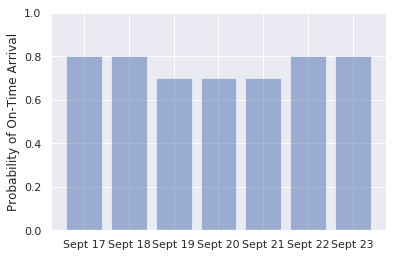

In [30]:
import numpy as np

labels = ('Sept 17', 'Sept 18', 'Sept 19', 'Sept 20', 'Sept 21', 'Sept 22', 'Sept 23')
values = (predict_on_time('17/9/2015 21:45:00', 'ABQ', 'ATL'),
          predict_on_time('18/9/2015 21:45:00', 'ABQ', 'ATL'),
          predict_on_time('19/9/2015 21:45:00', 'ABQ', 'ATL'),
          predict_on_time('20/9/2015 21:45:00', 'ABQ', 'ATL'),
          predict_on_time('21/9/2015 21:45:00', 'ABQ', 'ATL'),
          predict_on_time('22/9/2015 21:45:00', 'ABQ', 'ATL'),
          predict_on_time('23/9/2015 21:45:00', 'ABQ', 'ATL'))
alabels = np.arange(len(labels))

plt.bar(alabels, values, align='center', alpha=0.5)
plt.xticks(alabels, labels)
plt.ylabel('Probability of On-Time Arrival')
plt.ylim((0.0, 1.0))